In [137]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
import os.path

# google sheets
from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError

### Altenticação do google e captura de dados

In [138]:
# If modifying these scopes, delete the file token.json.
SCOPES = ['https://www.googleapis.com/auth/spreadsheets']

# Aqui deve ser colocado o ID da planilha que voce pode encontrar na URL da planilha
SAMPLE_SPREADSHEET_ID = '1SqHZsW9gv4sx4mXTIJ8MQ4FfrE8IqiZOcTp2hfJnJkg'
# Aqui deve ser colocado o nome da aba que voce quer ler seguindo o padrao: 'Nome da Aba'!A1:B2
SAMPLE_RANGE_NAME = 'contribuicao_festividade!A2:L1000'

creds = None
df = None
    
# verifica se o token.json existe
if os.path.exists('../env/token.json'):
    # Carrega as credenciais
    creds = Credentials.from_authorized_user_file('../env/token.json', SCOPES)
else:
    print('Redirecionando para autenticação...')
    
# Se nao existir o token.json, faz o login
if not creds or not creds.valid:
    # Se as credenciais expiraram, faz o refresh
    if creds and creds.expired and creds.refresh_token:
        creds.refresh(Request())
    else:
        flow = InstalledAppFlow.from_client_secrets_file(
            '../env/credentials.json', SCOPES)
        creds = flow.run_local_server(port=0)
    # Save the credentials for the next run
    with open('../env/token.json', 'w') as token:
        token.write(creds.to_json())
        
try:
    service = build('sheets', 'v4', credentials=creds)

    # Chama a API do Google Sheets
    sheet = service.spreadsheets()
    result = sheet.values().get(spreadsheetId=SAMPLE_SPREADSHEET_ID,
                                range=SAMPLE_RANGE_NAME).execute()
    values = result.get('values', [])
    df = pd.DataFrame(values, columns=['coluna1', 'coluna2', 'coluna3', 'coluna4', 'coluna5', 'coluna6', 'coluna7', 'coluna8', 'coluna9', 'coluna10', 'coluna11', 'coluna12'])
    
    # fazer download da planilha e salvar no diretório data
    with open('../data/contribuicao_festividade.csv', 'w') as f:
        f.write(df.to_csv(index=False))
          
    print('Planilha lida com sucesso!')

except HttpError as err:
    print(err)


Planilha lida com sucesso!


In [139]:
len(df)

26

In [140]:
df

,coluna1,coluna2,coluna3,coluna4,coluna5,coluna6,coluna7,coluna8,coluna9,coluna10,coluna11,coluna12
0,Varões,1º mês,2º mês,3º mês,4º mês,Valor,,Material de impressão,"R$46,00",None,None,None
1,Adeilton,Falta,Falta,Falta,Falta,"R$0,00",,Copos,"R$80,40",None,None,None
2,Elex,Pagou parte,Falta,Falta,Falta,"R$3,00",,Saquinhos para lembranças,"R$7,80",None,None,None
3,,Falta,Falta,Falta,Falta,,,Lembranças do varões,"R$180,00",,Contribuiçao,None
4,,Falta,Falta,Falta,Falta,,,Refrigerante,"R$101,00",,Contribuinte,valor
5,,Falta,Falta,Falta,Falta,,,Refrigerante,"R$40,00",,Jesse,"R$200,00"
6,,Falta,Falta,Falta,Falta,,,Doces,"R$57,00",,Irmã,"R$100,00"
7,,Falta,Falta,Falta,Falta,,,Pao,"R$120,00",,Ismael,"R$100,00"
8,,Falta,Falta,Falta,Falta,,,Bolo,"R$280,00",,Total:,"R$400,00"
9,,Falta,Falta,Falta,Falta,,,Verduras,"R$51,00",None,None,None


In [141]:
total_recebido_dos_varoes = float(df['coluna2'][23].replace('R$', '').replace('.', '').replace(',', '.').replace('\xa0', ''))
total_doacao = float(df['coluna12'][8].replace('R$', '').replace('.', '').replace(',', '.').replace('\xa0', ''))
total_gastos = float(df['coluna9'][14].replace('R$', '').replace('.', '').replace(',', '.').replace('\xa0', ''))
total_arrecadado = float(df['coluna9'][20].replace('R$', '').replace('.', '').replace(',', '.').replace('\xa0', ''))
total_positivo = round(total_arrecadado - total_gastos, 2)
total_faltante = float(df['coluna2'][25].replace('R$', '').replace('.', '').replace(',', '.').replace('\xa0', ''))

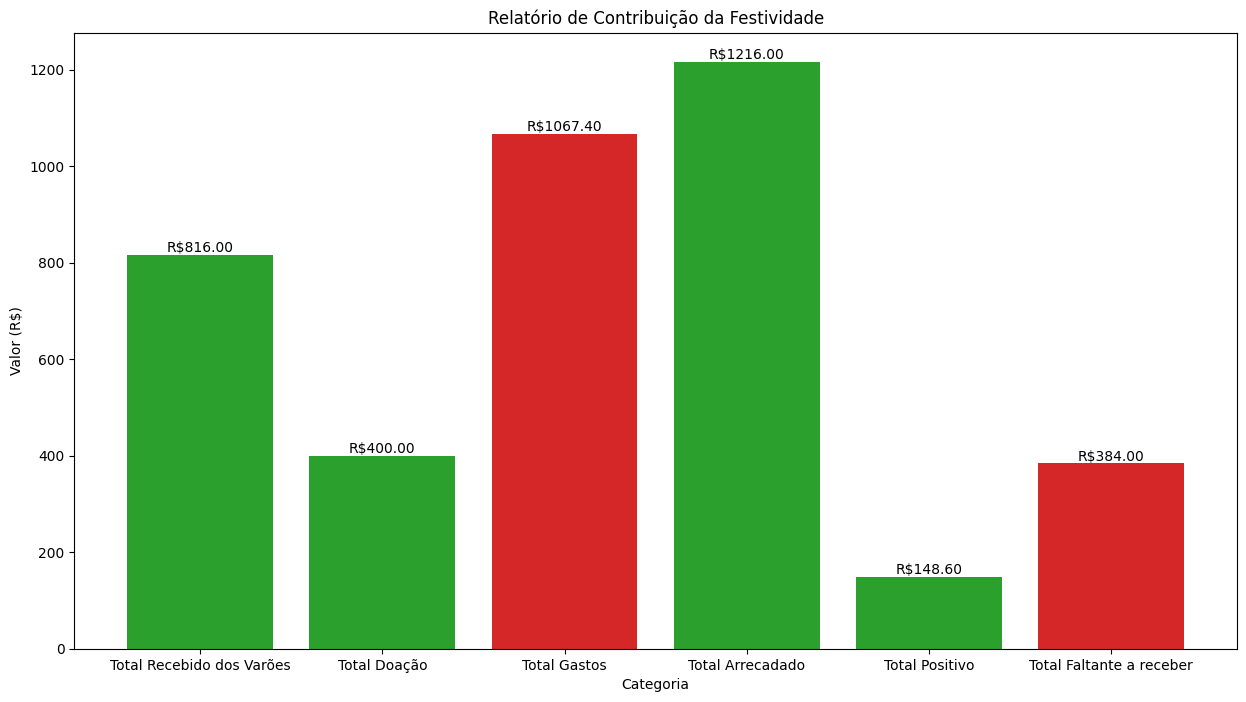

In [142]:
valores =[ total_recebido_dos_varoes, total_doacao, total_gastos, total_arrecadado, total_positivo, total_faltante]
etiquetas = ['Total Recebido dos Varões', 'Total Doação', 'Total Gastos', 'Total Arrecadado', 'Total Positivo', 'Total Faltante a receber']

plt.figure(figsize=(15,8))
grafico = plt.bar(etiquetas, valores, color=['#2ca02c', '#2ca02c', '#d62728', '#2ca02c', '#2ca02c', '#d62728'])
plt.title('Relatório de Contribuição da Festividade') 
plt.xlabel('Categoria')
plt.ylabel('Valor (R$)')
for barra in grafico:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, altura, f'R${altura:.2f}', ha='center', va='bottom')
plt.savefig('../img/reports/contribuicao_festividade.png')
plt.show()


In [143]:
#salvar imagem
